# 概要

* アタポンの2001位データの予測モデル
* ちょうど毎月開催されてるので、月次にしてみる
  * 「月の中で何日に開催された」とかは一旦考慮しない
* ローカル線形トレンドモデルにしてみる

# インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

# イベントデータ読み込み

In [2]:
input_dir = '../../common/event_data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df[df['形式'] == 'アタポン'].set_index('日付')
df

,イベント,1位,2001位,形式,属性,期間
日付,,,,,,
2015-09-25,アタシポンコツアンドロイド,427777,78330,アタポン,NaN,249.0
2015-10-19,Nation Blue,324369,67627,アタポン,NaN,198.0
2015-11-20,Orange Sapphire,350000,42944,アタポン,NaN,150.0
2015-12-18,Snow Wings,520000,50954,アタポン,NaN,222.0
2016-01-20,パステルピンクな恋,602529,43854,アタポン,NaN,174.0
2016-02-18,オルゴールの小箱,523819,56737,アタポン,NaN,174.0
2016-03-20,絶対特権主張しますっ！,530000,51353,アタポン,NaN,174.0
2016-04-19,つぼみ,666666,47907,アタポン,NaN,174.0
2016-05-19,明日また会えるよね,844167,58517,アタポン,NaN,198.0


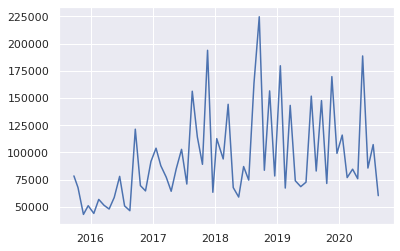

In [4]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.index
y = df.loc[:, '2001位']
ax.plot(x, y)
plt.show()

# stanデータ準備

In [8]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'y':       df['2001位'].tolist(), # 観測値
}

In [9]:
# Stanコード
model = """
data {
  int T;                   // データ取得期間の長さ
  vector[T] y;       // 観測値
}
parameters {
  vector[T] mu;      // 水準+ドリフト成分の推定値
  vector[T] delta;   // ドリフト成分の推定値
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_z; // ドリフト成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1] + delta[i-1], s_w);
    delta[i] ~ normal(delta[i-1], s_z);
    y[i] ~ normal(mu[i], s_v);
  }
}
"""

# Stan実行

In [7]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6756962f483cdcec6d2c866a76ea3170 NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmpkn5thp5o\stanfit4anon_model_6756962f483cdcec6d2c866a76ea3170_6842573035254843298.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 23.4 s


In [8]:
# パラメータ設定
n_itr = 4000
n_warmup = n_itr - 1000
chains = 3

In [9]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

Wall time: 25.3 s


In [10]:
# ファイル保存
save_dir = '../event_data/'
with open(save_dir + 'c3_model.pickle', mode="wb") as f:
    pickle.dump(stm, f)
with open(save_dir + 'c3_fit.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  


# 結果確認

In [5]:
# 読み込み
input_dir = '../event_data/'
with open(input_dir + 'c3_model.pickle', mode="rb") as f:
    stm = pickle.load(f)
with open(input_dir + 'c3_fit.pickle', mode="rb") as f:
    fit = pickle.load(f)

In [6]:
fit

Inference for Stan model: anon_model_6756962f483cdcec6d2c866a76ea3170.
3 chains, each with iter=4000; warmup=3000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]      4.6e4  1362.8  2.2e4 4113.1  3.1e4  4.7e4  6.1e4  9.1e4    261   1.01
mu[1]      4.8e4  1231.1  1.9e4  1.0e4  3.6e4  4.9e4  6.1e4  8.5e4    245   1.01
mu[2]      5.0e4  1163.4  1.7e4  1.4e4  3.8e4  5.0e4  6.2e4  8.2e4    221   1.01
mu[3]      5.2e4  1111.7  1.6e4  1.7e4  4.1e4  5.2e4  6.3e4  8.1e4    206   1.02
mu[4]      5.3e4  1052.1  1.5e4  2.2e4  4.3e4  5.4e4  6.4e4  8.0e4    205   1.02
mu[5]      5.6e4  1004.6  1.4e4  2.6e4  4.6e4  5.6e4  6.5e4  8.1e4    198   1.02
mu[6]      5.8e4  930.17  1.3e4  3.0e4  4.9e4  5.8e4  6.7e4  8.2e4    209   1.02
mu[7]      6.0e4  866.41  1.3e4  3.4e4  5.2e4  6.0e4  6.8e4  8.4e4    224   1.02
mu[8]      6.2e4  775.91  1.2e4  3.9e4  5.4e4  6.2e4  7.1e4  8.6e4    257   1.02
m

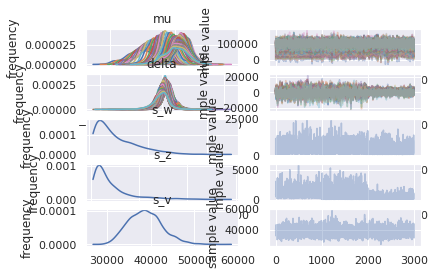

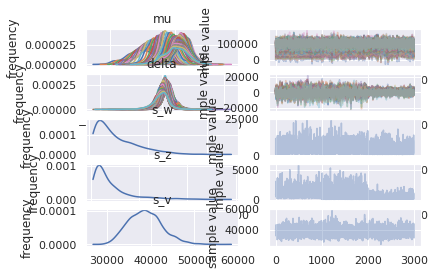

In [7]:
fit.plot()

In [8]:
#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

# delta
# 事後平均
delta_mean = ms['delta'].mean(axis=0)
# #95パーセンタイル抽出
delta_5 = np.array(pd.DataFrame(ms['delta']).apply(lambda x: np.percentile(x, 5), axis=0))
delta_95 = np.array(pd.DataFrame(ms['delta']).apply(lambda x: np.percentile(x, 95), axis=0))

#x軸
X = df.index

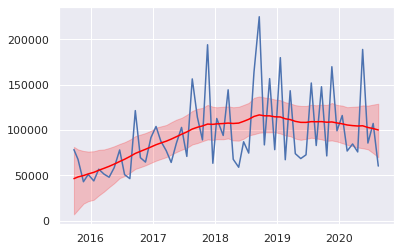

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['2001位'], label='observed')
# ax.plot(X, mu, label='true trend', c='green')
ax.plot(X, mu_mean, label='predicted trend', c='red')
plt.fill_between(X, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

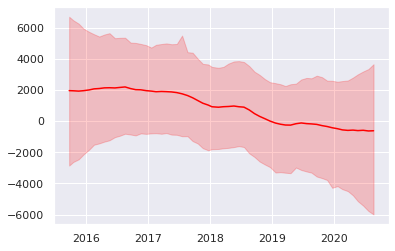

In [10]:
# delta
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, delta_mean, label='predicted trend', c='red')
plt.fill_between(X, delta_5, delta_95, color='red', alpha=0.2)
plt.show()

* こちらも全然当たっていない
* やはり、平滑化トレンドの滑らかさとローカルトレンドのガタガタの中間くらいになってる

# 残差確認

In [11]:
from sklearn.metrics import r2_score

In [12]:
df['predict'] = mu_mean
# 予測とのズレ（差）
df['diff'] = df['2001位'] - df['predict']
df.drop(['1位', '形式', '属性'], axis=1, inplace=True)

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


In [13]:
# 決定係数 (R2)
r2_score(df['2001位'], df['predict'])

0.2685642660933384

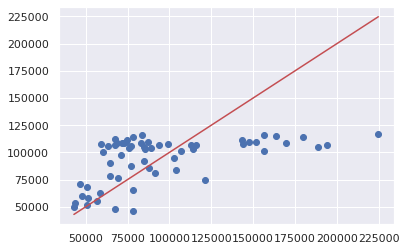

In [14]:
fig, ax = plt.subplots(1, 1)
ax.scatter(df['2001位'], df['predict'])
ideal_min = min(df['2001位'].min(), df['predict'].min())
ideal_max = max(df['2001位'].max(), df['predict'].max())
ax.plot([ideal_min, ideal_max], [ideal_min, ideal_max], color='r')
plt.show()